In [1]:
# Import statements
import pandas as pd
import numpy as np

In [2]:
# Import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

def distribution(data, value, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    # Map bands
    Data_Bands = {0: 'delta', 1: 'theta', 2: 'alpha', 3: 'beta', 4: 'gamma'}
    
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate([value]):
        ax = fig.add_subplot(1, 1, i+1)
        ax.hist(data[data.columns[feature-1]], bins = 25, color = '#00A0A0')
        ax.set_title("'%s-%s' Feature Distribution"%(Data_Bands[(feature-1)%5], feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 500))
        ax.set_yticks([0, 100, 200, 300, 400, 500])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous EEG Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous EEG Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()

In [3]:
# Import 'accuracy_score'
from sklearn.metrics import accuracy_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

In [4]:
# Import 'make_scorer', 'LDA', 'GridSearchCV', and 'ShuffleSplit'
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a linear discriminant analysis object
    clf = SVC(kernel='rbf', class_weight='balanced')
    
    # Create a dictionary for the parameters
    params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'clf', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(clf, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [5]:
# Allows the use of display() for DataFrames
from IPython.display import display

# Read the data.
raw_data = pd.read_csv('eeg_bands_vector.csv', header=None)

# Split the data into features and target label
target_raw = raw_data[raw_data.columns[-1]]
features_raw = raw_data.drop(raw_data.columns[-1], axis = 1)

# Print data shape. 
print("The shape of the data: {}".format(raw_data.shape))

# Success - Display the first nine records
display(raw_data.head(n=9))

The shape of the data: (306, 71)


,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,4816.391328,95.141335,10.649238,13.696271,5.123713,3363.835919,98.240686,9.599556,14.279812,5.486525,...,86.362334,9.980105,15.247112,6.104881,2.187726,0.898080,0.382410,0.197898,0.265768,1
1,10252.011470,58.775725,16.220624,15.579869,6.282816,11106.775120,65.447768,18.027499,16.832102,7.193603,...,52.676113,17.448570,18.509726,7.826144,1.691563,0.769268,0.379947,0.203456,0.262415,1
2,45490.900150,784.647872,73.576458,30.356943,9.107486,59068.735660,1048.649871,79.037651,26.376652,11.243441,...,854.469625,81.451781,33.521469,10.245063,5.834225,1.514771,0.392124,0.227573,0.266920,1
3,23685.522880,42.991571,11.379868,15.818142,8.316880,28133.384030,49.613903,13.745853,17.706852,9.769399,...,37.615594,12.865178,17.909553,10.255783,4.588588,1.001923,0.451629,0.231277,0.278081,2
4,8110.938182,94.697451,11.385847,17.073591,7.826207,9764.259919,103.204514,13.332962,18.855302,9.204882,...,94.816623,13.720995,19.837460,9.564213,5.428072,0.961745,0.429391,0.237631,0.271952,2
5,22255.633810,86.038957,17.022923,18.425179,12.082297,27074.031270,100.982622,18.663408,21.549487,13.522391,...,96.269029,16.924874,21.990818,14.509971,4.510646,1.264289,0.402275,0.231096,0.271481,2
6,7766.271738,32.617388,8.520500,11.859042,4.195241,9211.422465,35.987991,9.533516,12.441276,4.727086,...,27.583116,9.672876,13.637667,5.055784,5.475990,0.839924,0.400321,0.240103,0.275875,3
7,6286.291299,41.674503,9.890250,13.492383,4.547908,7528.065514,40.125362,11.004022,15.030803,5.166148,...,32.268506,10.157963,16.363462,5.572985,3.060446,0.930010,0.381068,0.244204,0.278499,3
8,112.121638,33.880324,8.517617,11.086055,3.961971,89.170595,21.431772,8.471547,11.216695,4.022903,...,14.077438,8.528090,11.766479,4.469224,2.003020,0.775987,0.356698,0.249330,0.280135,3


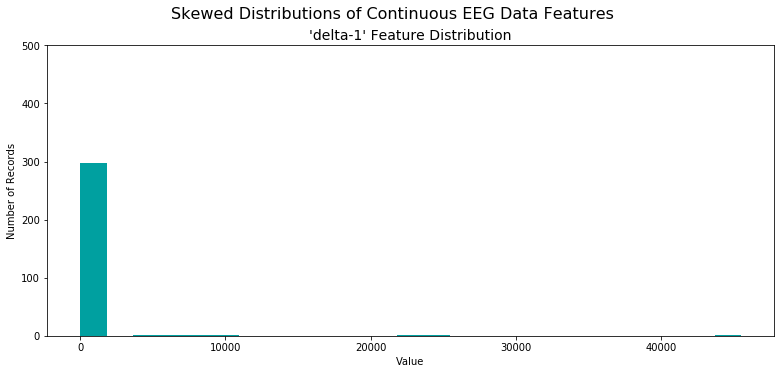

In [6]:
# Visualize skewed continuous features of original data
distribution(raw_data, 1)

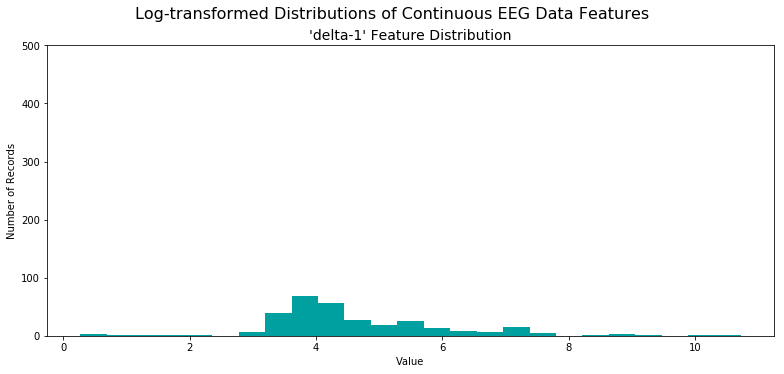

In [7]:
# Log-transform the skewed features
features_log_transformed = features_raw.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, 1, transformed = True)

In [8]:
# Calculate Q1 (25th percentile of the data) for the given feature
Q1 = features_log_transformed.quantile(0.25)

# Calculate Q3 (75th percentile of the data) for the given feature
Q3 = features_log_transformed.quantile(0.75)

# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
IQR = Q3 - Q1
step = 1.5 * IQR

# Remove the outliers from the dataset.
features_log_transformed_out = features_log_transformed[~((features_log_transformed < (Q1 - step)) |(features_log_transformed > (Q3 + step))).any(axis=1)]

# Join the features and the target after removing outliers.
preprocessed_data_out = features_log_transformed_out.join(target_raw)
target_raw_out = preprocessed_data_out[preprocessed_data_out.columns[-1]]

# Print data shape after removing outliers.
print("The shape of the data after removing outliers: {}".format(preprocessed_data_out.shape))

# Success - Display the first five records
display(preprocessed_data_out.head())

The shape of the data after removing outliers: (109, 71)


,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
18,6.137599,3.305895,2.334206,2.612499,1.654320,6.267501,3.034003,2.310474,2.544376,1.626727,...,2.600987,2.267783,2.551362,1.701405,0.360029,0.131892,0.081537,0.103669,0.222265,1
21,5.611662,3.006613,4.025758,2.637440,1.397908,5.287938,3.010112,4.073419,2.694181,1.487177,...,2.388684,4.008130,2.568824,1.490720,0.345273,0.113559,0.051649,0.077430,0.225841,2
22,5.996804,3.008687,3.760938,2.795713,1.509755,5.363677,2.935347,3.769469,2.778577,1.578930,...,2.430431,3.543891,2.593723,1.526216,0.480653,0.111815,0.048089,0.084116,0.224058,2
28,6.058736,3.811596,2.964972,3.144090,2.005060,5.091672,3.311616,2.763454,2.901296,1.842135,...,2.821904,2.509166,2.713311,1.642031,0.513521,0.173356,0.123587,0.094647,0.223008,1
29,5.592795,3.916238,2.756465,3.065881,1.999494,4.660207,3.450019,2.535624,2.840535,1.833741,...,2.794670,2.352440,2.652980,1.604302,0.704511,0.224689,0.127387,0.097714,0.222202,1


In [9]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform_out = scaler.fit_transform(features_log_transformed_out)

In [10]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Assign the features to the variable Bands, and the labels to the variable state. 
Bands = np.array(features_log_minmax_transform_out)
state = np.array(target_raw_out)

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Bands, state, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [11]:
# Import time and PCA
from time import time
from sklearn.decomposition import PCA

n_components = 7

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components)

# Pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Explained variance ratios:", pca.explained_variance_ratio_*100)
print("done in %0.3fs" % (time() - t0))


Extracting the top 7 eigenfaces from 87 faces
Explained variance ratios: [18.67991066 17.4031355  13.19895432  8.19830321  7.01229119  5.281814
  3.80332423]
done in 0.010s


In [12]:
# Fit the training data to the model using grid search
model = fit_model(X_train_pca, y_train)

# Produce the value for 'gamma' and 'C'
print("Parameter 'gamma' is {} for the optimal model.".format(model.get_params()['gamma']))
print("Parameter 'C' is {} for the optimal model.\n".format(model.get_params()['C']))

# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test_pca)

# Label states class.
states_class = ['Focused', 'De-Focused', 'Drowsy']

# Show predictions
for i, state in enumerate(y_pred):
    print("Predicted mental state for test {}'s bands: {}".format(i+1, states_class[state-1]))

Parameter 'gamma' is 0.01 for the optimal model.
Parameter 'C' is 1000.0 for the optimal model.

Predicted mental state for test 1's bands: Focused
Predicted mental state for test 2's bands: Drowsy
Predicted mental state for test 3's bands: Focused
Predicted mental state for test 4's bands: Drowsy
Predicted mental state for test 5's bands: Drowsy
Predicted mental state for test 6's bands: Drowsy
Predicted mental state for test 7's bands: Drowsy
Predicted mental state for test 8's bands: Drowsy
Predicted mental state for test 9's bands: Focused
Predicted mental state for test 10's bands: Drowsy
Predicted mental state for test 11's bands: Focused
Predicted mental state for test 12's bands: De-Focused
Predicted mental state for test 13's bands: Focused
Predicted mental state for test 14's bands: De-Focused
Predicted mental state for test 15's bands: Drowsy
Predicted mental state for test 16's bands: Drowsy
Predicted mental state for test 17's bands: De-Focused
Predicted mental state for t

In [13]:
# Import 'f1_score'
from sklearn.metrics import f1_score

# Calculate the f1 score and assign it to the variable score.
score = f1_score(y_test, y_pred, average='micro')

# Print score
print("F1 score: %0.3f %%" %(score*100))

F1 score: 86.364 %
